In [ ]:
# regression problem statement with ANN
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv') # loading dataset in dataframe

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# normalizing the input values by min-max sclaing becuase the limits of each input is known

In [ ]:
# 7inputs and 7 hidden nodes 1 output node

In [11]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]], shape=(400, 7))

In [50]:
# building architecture of neural networks
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [51]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))# input layer as well as the hidden layer
model.add(Dense(1,activation='linear')) # output layer
model.summary()

c:\Users\ASUS\OneDrive\Desktop\DL\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

# 1️⃣ Define custom R² metric function
def r2_metric(y_true, y_pred):
    ss_res =  K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res/(ss_tot + K.epsilon())

In [59]:
model.compile(optimizer='adam', loss='mse', metrics=['mae',r2_metric])
history=model.fit(xtrain,ytrain,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0288 - mae: 0.1365 - r2_metric: -0.5035 - val_loss: 0.0240 - val_mae: 0.1262 - val_r2_metric: -1.0358
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0246 - mae: 0.1260 - r2_metric: -0.2310 - val_loss: 0.0211 - val_mae: 0.1178 - val_r2_metric: -0.7684
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216 - mae: 0.1179 - r2_metric: -0.0959 - val_loss: 0.0187 - val_mae: 0.1116 - val_r2_metric: -0.5712
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0189 - mae: 0.1104 - r2_metric: 0.0574 - val_loss: 0.0166 - val_mae: 0.1049 - val_r2_metric: -0.3842
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 - mae: 0.1035 - r2_metric: 0.1503 - val_loss: 0.0148 - val_mae: 0.0991 - val_r2_metric: -0.2294
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mae: 0.0979 - r2_metric: 0.2408 - val_loss: 0.0133 - val_mae: 0.0937 - val_r2_metric: -0.0966
Epoch 7/200
10/10 ━━━━━━

In [60]:
from sklearn.metrics import r2_score
ypred=model.predict(xtest)
r2_score(ytest,ypred)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/stepWARNING:tensorflow:5 out of the last 21 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F388CCB9A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.8334411509489087

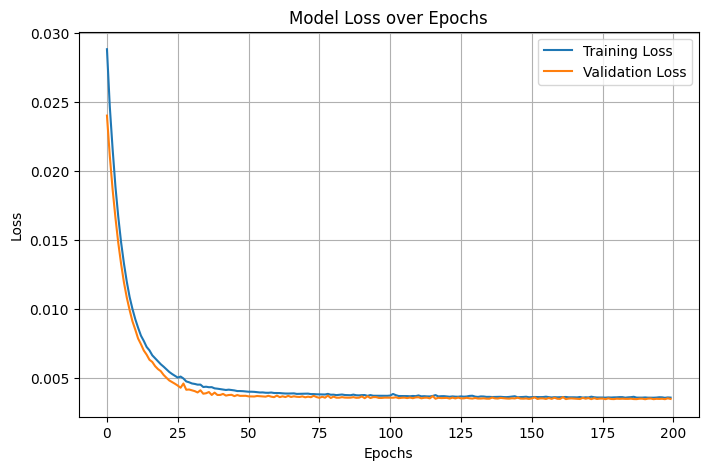

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
print(history.history.keys())


dict_keys(['loss', 'mae', 'r2_metric', 'val_loss', 'val_mae', 'val_r2_metric'])


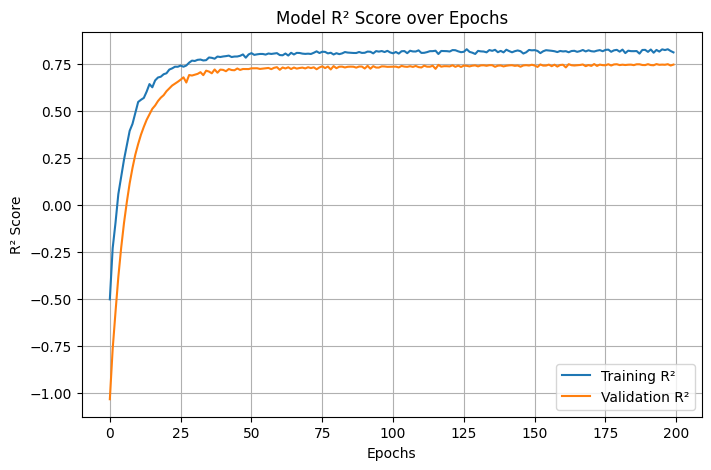

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['r2_metric'], label='Training R²')
plt.plot(history.history['val_r2_metric'], label='Validation R²')
plt.title('Model R² Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()


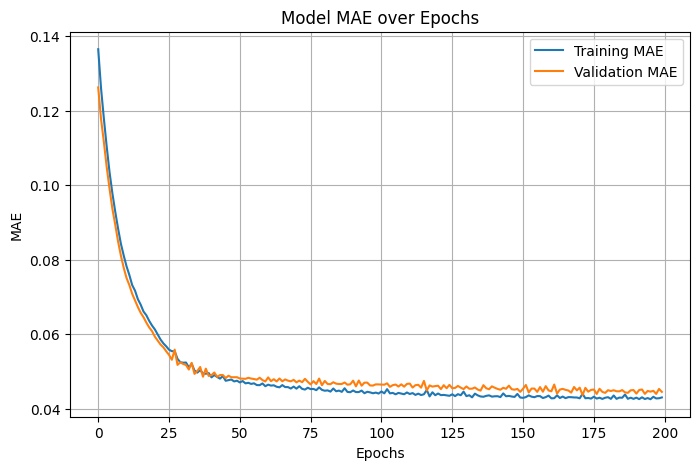

In [64]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()
